In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Change directory
%cd /content/drive/My Drive/Colab Notebooks

/content/drive/My Drive/Colab Notebooks


In [ ]:
ls

 Base10/
'Copy of IDS 561 - Group Project - Team 4.ipynb'
'Copy of IDS 561 - Group Project VER 2 - Team 4.ipynb'
 Crypto.ipynb
 fraud.csv
'healthcare analytics'/
 HW2PySparkAssignment.ipynb
 HW3_Pyspark.ipynb
 ilead/
 LoanDefaultProject.ipynb
 Nomics-Dashboard-USD-1d-2022-02-05T08_06_12.721Z.csv
 Nomics-Dashboard-USD-1d-2022-02-05T08_06_12.721Z.gsheet
'Number guessing game'
 test_v2.csv
 train_v2.csv


# EDA on Crypocurrency Market Data from Nomics (data extracted on 5th Feb)

In [ ]:
import pandas as pd
data = pd.read_csv("Nomics-Dashboard-USD-1d-2022-02-05T08_06_12.721Z.csv")
data.head()


,id,currency,symbol,name,logo_url,status,price,price_date,price_timestamp,circulating_supply,max_supply,market_cap,market_cap_dominance,num_exchanges,num_pairs,num_pairs_unmapped,first_candle,first_trade,first_order_book,rank,rank_delta,high,high_timestamp,1d.volume,1d.price_change,1d.price_change_pct,1d.volume_change,1d.volume_change_pct,1d.market_cap_change,1d.market_cap_change_pct,platform_currency,first_priced_at
0,BTC,BTC,BTC,Bitcoin,https://s3.us-east-2.amazonaws.com/nomics-api/...,active,41432.440358,2022-02-05T00:00:00Z,2022-02-05T08:05:00Z,18949212,2.100000e+07,785112096030,0.3967,408,84980,6748,2011-08-18T00:00:00Z,2011-08-18T00:00:00Z,2017-01-06T00:00:00Z,1,0,67600.827124,2021-11-08T00:00:00Z,3.671903e+10,3430.715605,0.0903,9.505178e+09,0.3493,6.503596e+10,0.0903,NaN,NaN
1,ETH,ETH,ETH,Ethereum,https://s3.us-east-2.amazonaws.com/nomics-api/...,active,3005.758319,2022-02-05T00:00:00Z,2022-02-05T08:05:00Z,119452140,NaN,359044262581,0.1814,441,77928,58288,2015-08-07T00:00:00Z,2015-08-07T00:00:00Z,2018-08-29T00:00:00Z,2,0,4811.685292,2021-11-08T00:00:00Z,2.582440e+10,168.069118,0.0592,3.632728e+09,0.1637,2.011543e+10,0.0594,ETH,NaN
2,USDT,USDT,USDT,Tether,https://s3.us-east-2.amazonaws.com/nomics-api/...,active,1.000597,2022-02-05T00:00:00Z,2022-02-05T08:05:00Z,77908751039,NaN,77955258506,0.0394,385,71828,24544,2013-12-27T00:00:00Z,2013-12-27T00:00:00Z,2018-08-29T00:00:00Z,3,0,1.089935,2017-12-23T00:00:00Z,7.387999e+10,-0.000714,-0.0007,1.215816e+10,0.1970,-1.016081e+08,-0.0013,ETH,NaN
3,BNB,BNB,BNB,Binance Coin,https://s3.us-east-2.amazonaws.com/nomics-api/...,active,423.407103,2022-02-05T00:00:00Z,2022-02-05T08:05:00Z,168137036,1.681370e+08,71190415210,0.0360,179,17249,787168,2017-07-14T00:00:00Z,2017-07-14T00:00:00Z,2018-08-29T00:00:00Z,4,0,677.116755,2021-05-03T00:00:00Z,2.441574e+09,44.188715,0.1165,9.290932e+08,0.6143,7.429760e+09,0.1165,BNB,NaN
4,USDC,USDC,USDC,USD Coin,https://s3.us-east-2.amazonaws.com/nomics-api/...,active,1.000354,2022-02-05T00:00:00Z,2022-02-05T08:05:00Z,50943646512,5.094365e+10,50961659200,0.0257,234,6517,7788,2018-09-27T00:00:00Z,2018-09-27T00:00:00Z,2018-10-26T00:00:00Z,5,0,1.030889,2019-05-02T00:00:00Z,5.583231e+09,-0.000643,-0.0006,1.077047e+09,0.2390,9.275484e+07,0.0018,ETH,NaN


In [ ]:
# Filtering out rows with only active status
data1 = data.query('status == "active"')
data1
#all active - 100 crytocurrencies

,id,currency,symbol,name,logo_url,status,price,price_date,price_timestamp,circulating_supply,max_supply,market_cap,market_cap_dominance,num_exchanges,num_pairs,num_pairs_unmapped,first_candle,first_trade,first_order_book,rank,rank_delta,high,high_timestamp,1d.volume,1d.price_change,1d.price_change_pct,1d.volume_change,1d.volume_change_pct,1d.market_cap_change,1d.market_cap_change_pct,platform_currency,first_priced_at
0,BTC,BTC,BTC,Bitcoin,https://s3.us-east-2.amazonaws.com/nomics-api/...,active,41432.440358,2022-02-05T00:00:00Z,2022-02-05T08:05:00Z,18949212,2.100000e+07,785112096030,0.3967,408,84980,6748,2011-08-18T00:00:00Z,2011-08-18T00:00:00Z,2017-01-06T00:00:00Z,1,0,67600.827124,2021-11-08T00:00:00Z,3.671903e+10,3430.715605,0.0903,9.505178e+09,0.3493,6.503596e+10,0.0903,NaN,NaN
1,ETH,ETH,ETH,Ethereum,https://s3.us-east-2.amazonaws.com/nomics-api/...,active,3005.758319,2022-02-05T00:00:00Z,2022-02-05T08:05:00Z,119452140,NaN,359044262581,0.1814,441,77928,58288,2015-08-07T00:00:00Z,2015-08-07T00:00:00Z,2018-08-29T00:00:00Z,2,0,4811.685292,2021-11-08T00:00:00Z,2.582440e+10,168.069118,0.0592,3.632728e+09,0.1637,2.011543e+10,0.0594,ETH,NaN
2,USDT,USDT,USDT,Tether,https://s3.us-east-2.amazonaws.com/nomics-api/...,active,1.000597,2022-02-05T00:00:00Z,2022-02-05T08:05:00Z,77908751039,NaN,77955258506,0.0394,385,71828,24544,2013-12-27T00:00:00Z,2013-12-27T00:00:00Z,2018-08-29T00:00:00Z,3,0,1.089935,2017-12-23T00:00:00Z,7.387999e+10,-0.000714,-0.0007,1.215816e+10,0.1970,-1.016081e+08,-0.0013,ETH,NaN
3,BNB,BNB,BNB,Binance Coin,https://s3.us-east-2.amazonaws.com/nomics-api/...,active,423.407103,2022-02-05T00:00:00Z,2022-02-05T08:05:00Z,168137036,1.681370e+08,71190415210,0.0360,179,17249,787168,2017-07-14T00:00:00Z,2017-07-14T00:00:00Z,2018-08-29T00:00:00Z,4,0,677.116755,2021-05-03T00:00:00Z,2.441574e+09,44.188715,0.1165,9.290932e+08,0.6143,7.429760e+09,0.1165,BNB,NaN
4,USDC,USDC,USDC,USD Coin,https://s3.us-east-2.amazonaws.com/nomics-api/...,active,1.000354,2022-02-05T00:00:00Z,2022-02-05T08:05:00Z,50943646512,5.094365e+10,50961659200,0.0257,234,6517,7788,2018-09-27T00:00:00Z,2018-09-27T00:00:00Z,2018-10-26T00:00:00Z,5,0,1.030889,2019-05-02T00:00:00Z,5.583231e+09,-0.000643,-0.0006,1.077047e+09,0.2390,9.275484e+07,0.0018,ETH,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,HBTC,HBTC,HBTC,Huobi BTC (ERC-20),https://s3.us-east-2.amazonaws.com/nomics-api/...,active,41627.443921,2022-02-05T00:00:00Z,2022-02-05T08:00:00Z,25049,3.988400e+04,1042728807,0.0005,9,11,0,2020-08-27T00:00:00Z,2020-08-27T00:00:00Z,2020-09-28T00:00:00Z,96,-2,67794.685035,2021-11-08T00:00:00Z,6.189737e+05,3426.762681,0.0897,-8.501493e+06,-0.9321,8.583722e+07,0.0897,ETH,2020-12-20T19:05:46.698792Z
96,XEM,XEM,XEM,NEM,https://s3.us-east-2.amazonaws.com/nomics-api/...,active,0.111562,2022-02-05T00:00:00Z,2022-02-05T08:05:00Z,8999999999,9.000000e+09,1004058171,0.0005,90,212,1,2015-03-31T00:00:00Z,2015-03-31T00:00:00Z,2018-08-29T00:00:00Z,97,-1,1.812583,2018-01-07T00:00:00Z,3.050444e+07,0.006346,0.0603,8.867158e+05,0.0299,5.711599e+07,0.0603,NaN,NaN
97,WAVES,WAVES,WAVES,Waves,https://s3.us-east-2.amazonaws.com/nomics-api/...,active,9.722186,2022-02-05T00:00:00Z,2022-02-05T08:05:00Z,100000000,1.000000e+08,972218614,0.0005,86,1568,6161,2016-06-20T00:00:00Z,2016-11-15T00:00:00Z,2018-08-29T00:00:00Z,98,0,35.905538,2021-05-05T00:00:00Z,1.404618e+08,0.698193,0.0774,-2.666007e+07,-0.1595,6.981929e+07,0.0774,WAVES,NaN
98,DCR,DCR,DCR,Decred,https://s3.us-east-2.amazonaws.com/nomics-api/...,active,67.518227,2022-02-05T00:00:00Z,2022-02-05T08:04:00Z,13739168,2.100000e+07,927644250,0.0005,53,120,0,2016-02-09T00:00:00Z,2016-05-16T00:00:00Z,2018-09-12T00:00:00Z,99,0,246.066592,2021-04-16T00:00:00Z,5.376022e+06,3.033586,0.0470,9.101094e+05,0.2038,4.188394e+07,0.0473,NaN,NaN


In [ ]:
# Selecting the 'id' and the 'market_cap' columns
cap = data[["id","market_cap"]]


Bitcoin v/s others

In [ ]:
#Declaring these now for later use in the plots
TOP_CAP_TITLE = 'Top 10 market capitalization'
TOP_CAP_YLABEL = '% of total cap'

# Selecting the first 10 rows and setting the index
cap10 = cap[:10].set_index("id")

# Calculating market_cap_perc
cap10 = cap10.assign(market_cap_perc=lambda x:(x.market_cap/cap.market_cap.sum())*100)
cap10

,market_cap,market_cap_perc
id,,
BTC,785112096030,41.379785
ETH,359044262581,18.923635
USDT,77955258506,4.108677
BNB,71190415210,3.752132
USDC,50961659200,2.685964
ADA,37074879240,1.954053
SOL,36539842284,1.925853
XRP,32123786367,1.693103
HEX,26582334650,1.401037


Text(0, 0.5, '% of total cap')

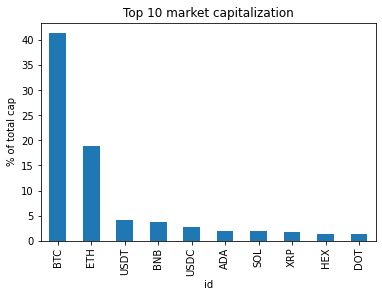

In [ ]:
# Plotting the barplot with the title defined above 
ax = cap10.market_cap_perc.plot.bar(title=TOP_CAP_TITLE)
ax.set_ylabel(TOP_CAP_YLABEL)

**Defining Volatility in Cryptocurrencies - find the same data after 7 days and after 24 hours >> calculate the % change >> Invest in those where the volatility is low**

Get the markets data

## Importing the data of BTC,ETH,BNB,DOGE,ADA,XRP,USDT,DOT,BCH,LTC

## will have to add a cron job in server to get the data with different intervals

# Historical Data EDA - Yahoo Finance

Date: date of observation

Open: The opening price

High: Highest price

Low: Lowest price

Close: The closing price

Adj Close: The closing price after adjustments for splits and dividend

Volume: Total stocks traded

In [ ]:
pip install yfinance

  Using cached yfinance-0.1.70-py2.py3-none-any.whl (26 kB)
  Using cached lxml-4.8.0-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (6.4 MB)
  Using cached requests-2.27.1-py2.py3-none-any.whl (63 kB)
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
#Load the required libraries
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# list of crptocurrencies as ticker arguments
cryptocurrencies = ['BNB-USD','BTC-USD', 'ETH-USD','USDT-USD','USDC-USD','ADA-USD','XRP-USD']
data = yf.download(cryptocurrencies, start='2020-01-01',
                end='2022-02-16')
data.head()

[*********************100%***********************]  7 of 7 completed


Adj Close             ...       Volume            
             ADA-USD    BNB-USD  ...     USDT-USD     XRP-USD
Date                             ...                         
2020-01-01  0.033458  13.689083  ...  21503143454  1041134003
2020-01-02  0.032751  13.027011  ...  24212314977  1085351426
2020-01-03  0.034180  13.660452  ...  32420287856  1270017043
2020-01-04  0.034595  13.891512  ...  21585629320   999331594
2020-01-05  0.034721  14.111019  ...  24090142146  1168067557

[5 rows x 42 columns]

In [ ]:
# check for missing data
data.isnull().any()

Adj Close  ADA-USD     False
           BNB-USD     False
           BTC-USD     False
           ETH-USD     False
           USDC-USD    False
           USDT-USD    False
           XRP-USD     False
Close      ADA-USD     False
           BNB-USD     False
           BTC-USD     False
           ETH-USD     False
           USDC-USD    False
           USDT-USD    False
           XRP-USD     False
High       ADA-USD     False
           BNB-USD     False
           BTC-USD     False
           ETH-USD     False
           USDC-USD    False
           USDT-USD    False
           XRP-USD     False
Low        ADA-USD     False
           BNB-USD     False
           BTC-USD     False
           ETH-USD     False
           USDC-USD    False
           USDT-USD    False
           XRP-USD     False
Open       ADA-USD     False
           BNB-USD     False
           BTC-USD     False
           ETH-USD     False
           USDC-USD    False
           USDT-USD    False
           XRP

In [ ]:
## we exclude SOL-USD from our data due to missing values

## EDA - Adjusted Closing Price

In [ ]:
adj_close=data['Adj Close']
adj_close.head()

,ADA-USD,BNB-USD,BTC-USD,ETH-USD,USDC-USD,USDT-USD,XRP-USD
Date,,,,,,,
2020-01-01,0.033458,13.689083,7200.174316,130.802002,1.004079,0.999836,0.192667
2020-01-02,0.032751,13.027011,6985.470215,127.410179,1.005017,1.001565,0.188043
2020-01-03,0.034180,13.660452,7344.884277,134.171707,1.005273,1.004192,0.193521
2020-01-04,0.034595,13.891512,7410.656738,135.069366,1.009466,1.007472,0.194355
2020-01-05,0.034721,14.111019,7411.317383,136.276779,1.008497,1.006197,0.195537


In [ ]:
adj_close.mean()

ADA-USD         0.815746
BNB-USD       213.497885
BTC-USD     29986.714059
ETH-USD      1631.253935
USDC-USD        1.001050
USDT-USD        1.000893
XRP-USD         0.573114
dtype: float64

Text(0.5, 1.0, 'Average Adjusted Closing Prices')

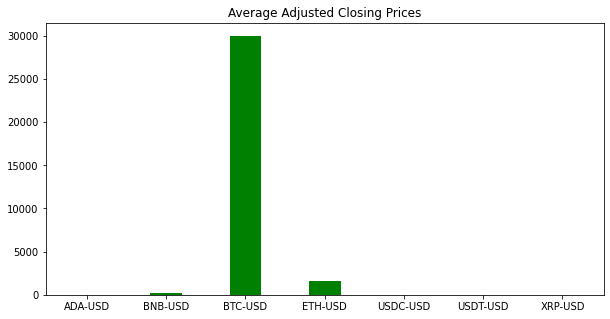

In [ ]:
values = list(adj_close.mean())
labels = ['ADA-USD', 'BNB-USD', 'BTC-USD', 'ETH-USD', 'USDC-USD', 'USDT-USD', 'XRP-USD']
fig = plt.figure(figsize = (10, 5))
# creating the bar plot
plt.bar(labels, values, color ='green',
        width = 0.4)
plt.title("Average Adjusted Closing Prices")

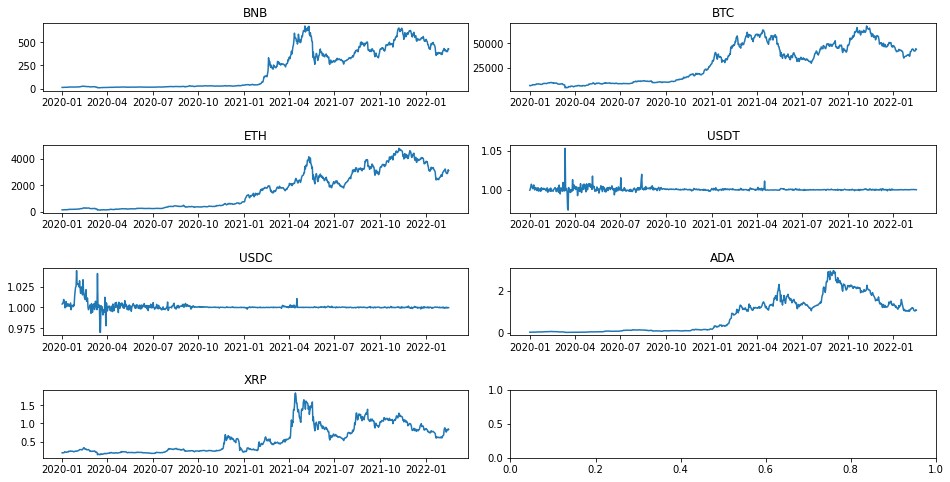

In [ ]:
# ploting the adjusted closing price
fig, axs =plt.subplots(4,2,figsize=(16,8),gridspec_kw ={'hspace': 0.8, 'wspace': 0.1})
axs[0,0].plot(adj_close['BNB-USD'])
axs[0,0].set_title('BNB')
axs[0,1].plot(adj_close['BTC-USD'])
axs[0,1].set_title('BTC')
axs[1,0].plot(adj_close['ETH-USD'])
axs[1,0].set_title('ETH')
axs[1,1].plot(adj_close['USDT-USD'])
axs[1,1].set_title('USDT')
axs[2,0].plot(adj_close['USDC-USD'])
axs[2,0].set_title('USDC')
axs[2,1].plot(adj_close['ADA-USD'])
axs[2,1].set_title('ADA')
axs[3,0].plot(adj_close['XRP-USD'])
axs[3,0].set_title('XRP')
plt.show()


The plots are time series plots, indicating the change in stock price over time. Since the scales are different, we cannot compare the charts but, we’ll instead use the cumulative returns chart, which gives relative changes.

A return is a change in the price of an asset over time. Returns can be positive, representing a profit, or negative, indicating a loss. Return series of an asset are easier to handle than price series and give a complete summary of the investment opportunity.

In [ ]:
# Returns i.e. percentage change in the adjusted close price and drop the first row with NA's
returns = adj_close.pct_change().dropna(axis=0)
#view the first 5 rows of the data frame
returns.head()

,ADA-USD,BNB-USD,BTC-USD,ETH-USD,USDC-USD,USDT-USD,XRP-USD
Date,,,,,,,
2020-01-02,-0.021131,-0.048365,-0.029819,-0.025931,0.000934,0.001729,-0.024000
2020-01-03,0.043632,0.048625,0.051452,0.053069,0.000255,0.002623,0.029132
2020-01-04,0.012142,0.016915,0.008955,0.006690,0.004171,0.003266,0.004310
2020-01-05,0.003642,0.015802,0.000089,0.008939,-0.000960,-0.001266,0.006082
2020-01-06,0.073471,0.060009,0.048291,0.058905,-0.005333,-0.003274,0.132829


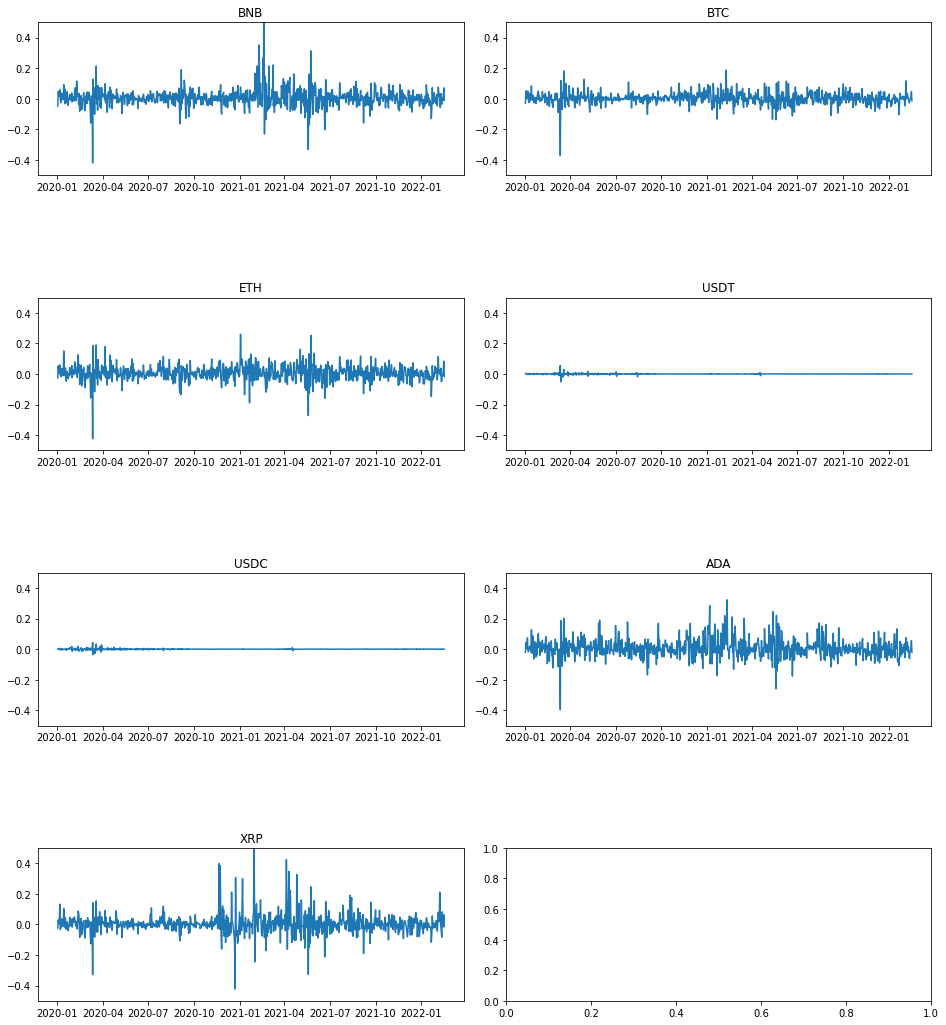

In [ ]:
#ploting the returns
fig, axs = plt.subplots(4,2,figsize=(16,18),gridspec_kw ={'hspace': 0.8, 'wspace': 0.1})
axs[0,0].plot(returns['BNB-USD'])
axs[0,0].set_title('BNB')
axs[0,0].set_ylim([-0.5,0.5])
axs[0,1].plot(returns['BTC-USD'])
axs[0,1].set_title('BTC')
axs[0,1].set_ylim([-0.5,0.5])
axs[1,0].plot(returns['ETH-USD'])
axs[1,0].set_title('ETH')
axs[1,0].set_ylim([-0.5,0.5])
axs[1,1].plot(returns['USDT-USD'])
axs[1,1].set_title('USDT')
axs[1,1].set_ylim([-0.5,0.5])
axs[2,0].plot(returns['USDC-USD'])
axs[2,0].set_title('USDC')
axs[2,0].set_ylim([-0.5,0.5])
axs[2,1].plot(returns['ADA-USD'])
axs[2,1].set_title('ADA')
axs[2,1].set_ylim([-0.5,0.5])
axs[3,0].plot(returns['XRP-USD'])
axs[3,0].set_title('XRP')
axs[3,0].set_ylim([-0.5,0.5])
plt.show()

In [ ]:
returns.describe()

,ADA-USD,BNB-USD,BTC-USD,ETH-USD,USDC-USD,USDT-USD,XRP-USD
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000
mean,0.006440,0.006372,0.003136,0.005505,0.000002,0.000008,0.004261
std,0.062745,0.063240,0.039494,0.052297,0.003903,0.003887,0.069865
min,-0.395672,-0.419046,-0.371695,-0.423472,-0.036549,-0.051212,-0.423340
25%,-0.028095,-0.019455,-0.014571,-0.020059,-0.000423,-0.000528,-0.022035
50%,0.002984,0.003864,0.002374,0.005164,0.000013,-0.000016,0.002030
75%,0.033992,0.031884,0.021172,0.032534,0.000416,0.000563,0.025215
max,0.322384,0.697604,0.187465,0.259475,0.043352,0.054845,0.560109


In [ ]:
(returns.columns)

Index(['ADA-USD', 'BNB-USD', 'BTC-USD', 'ETH-USD', 'USDC-USD', 'USDT-USD',
       'XRP-USD'],
      dtype='object')

## Volatility

Std deviations in the return defines Volatility

Volatility is a measure of change in the price of an asset over time. The higher the standard deviation, the more volatile an asset is.

Text(0.5, 1.0, 'Volatility in cryto')

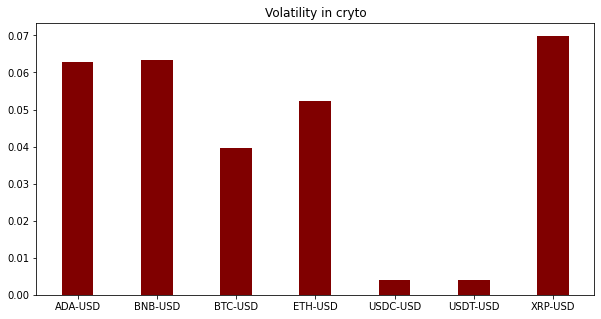

In [ ]:
values = list(returns.std())
labels = ['ADA-USD', 'BNB-USD', 'BTC-USD', 'ETH-USD', 'USDC-USD', 'USDT-USD', 'XRP-USD']
fig = plt.figure(figsize = (10, 5))
# creating the bar plot
plt.bar(labels, values, color ='maroon',
        width = 0.4)
plt.title("Volatility in cryto")

## Cumulative Returns

Cumulative return express the total change in the price of an asset over time

In [ ]:
# Cumulative return series
cum_returns = ((1 + returns).cumprod() - 1) *100
cum_returns.head()

,ADA-USD,BNB-USD,BTC-USD,ETH-USD,USDC-USD,USDT-USD,XRP-USD
Date,,,,,,,
2020-01-02,-2.113087,-4.836498,-2.981929,-2.593097,0.093425,0.172924,-2.400000
2020-01-03,2.157936,-0.209154,2.009812,2.576188,0.118915,0.435668,0.443244
2020-01-04,3.398300,1.478761,2.923296,3.262461,0.536518,0.763726,0.876117
2020-01-05,3.774882,3.082281,2.932472,4.185545,0.440007,0.636199,1.489613
2020-01-06,11.399369,9.268148,7.903210,10.322588,-0.095609,0.306746,14.970381


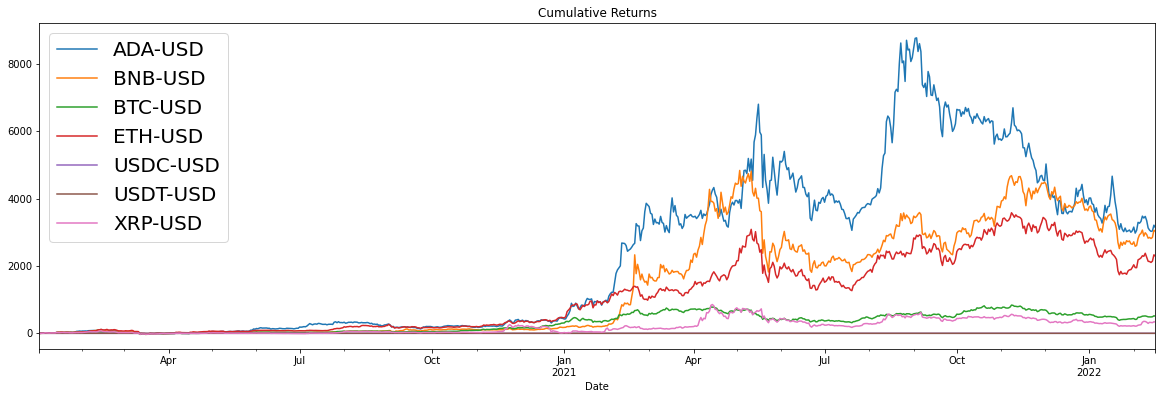

In [ ]:
cum_returns.plot(figsize=(20,6))
plt.title('Cumulative Returns')
plt.legend(loc=2, prop={'size': 20})

## Coorelation

compute correlation on return since correlation on raw price data can give biased results. 

Correlation coefficients close to 1 indicate a strong positive association, -1 indicate a strong negative association and coefficients close to zero indicate no association.

In [ ]:
#compute the correlations
returns.corr()

,ADA-USD,BNB-USD,BTC-USD,ETH-USD,USDC-USD,USDT-USD,XRP-USD
ADA-USD,1.000000,0.575022,0.633885,0.699376,-0.081757,-0.154208,0.535540
BNB-USD,0.575022,1.000000,0.648394,0.667530,-0.084079,-0.149908,0.503778
BTC-USD,0.633885,0.648394,1.000000,0.799259,-0.110544,-0.199007,0.549830
ETH-USD,0.699376,0.667530,0.799259,1.000000,-0.120273,-0.204080,0.587492
USDC-USD,-0.081757,-0.084079,-0.110544,-0.120273,1.000000,0.792218,-0.073716
USDT-USD,-0.154208,-0.149908,-0.199007,-0.204080,0.792218,1.000000,-0.120458
XRP-USD,0.535540,0.503778,0.549830,0.587492,-0.073716,-0.120458,1.000000


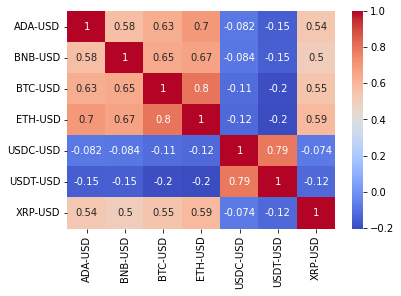

In [ ]:
#plot the correlations
sns.heatmap(returns.corr(), annot=True, cmap='coolwarm')
plt.show()

From the heatmap, we can see that Bitcoin and Ethereum are highly correlated(0.8). That means when Bitcoin goes up, Ethereum also goes up, and when Bitcoin falls, Ethereum also falls. 

Similarly, USDC and USDT are highly correlated. (0.79)

ETH & ADA also have a correlation of 0.7

## Moving Averages - 7 days - Short Term Trend

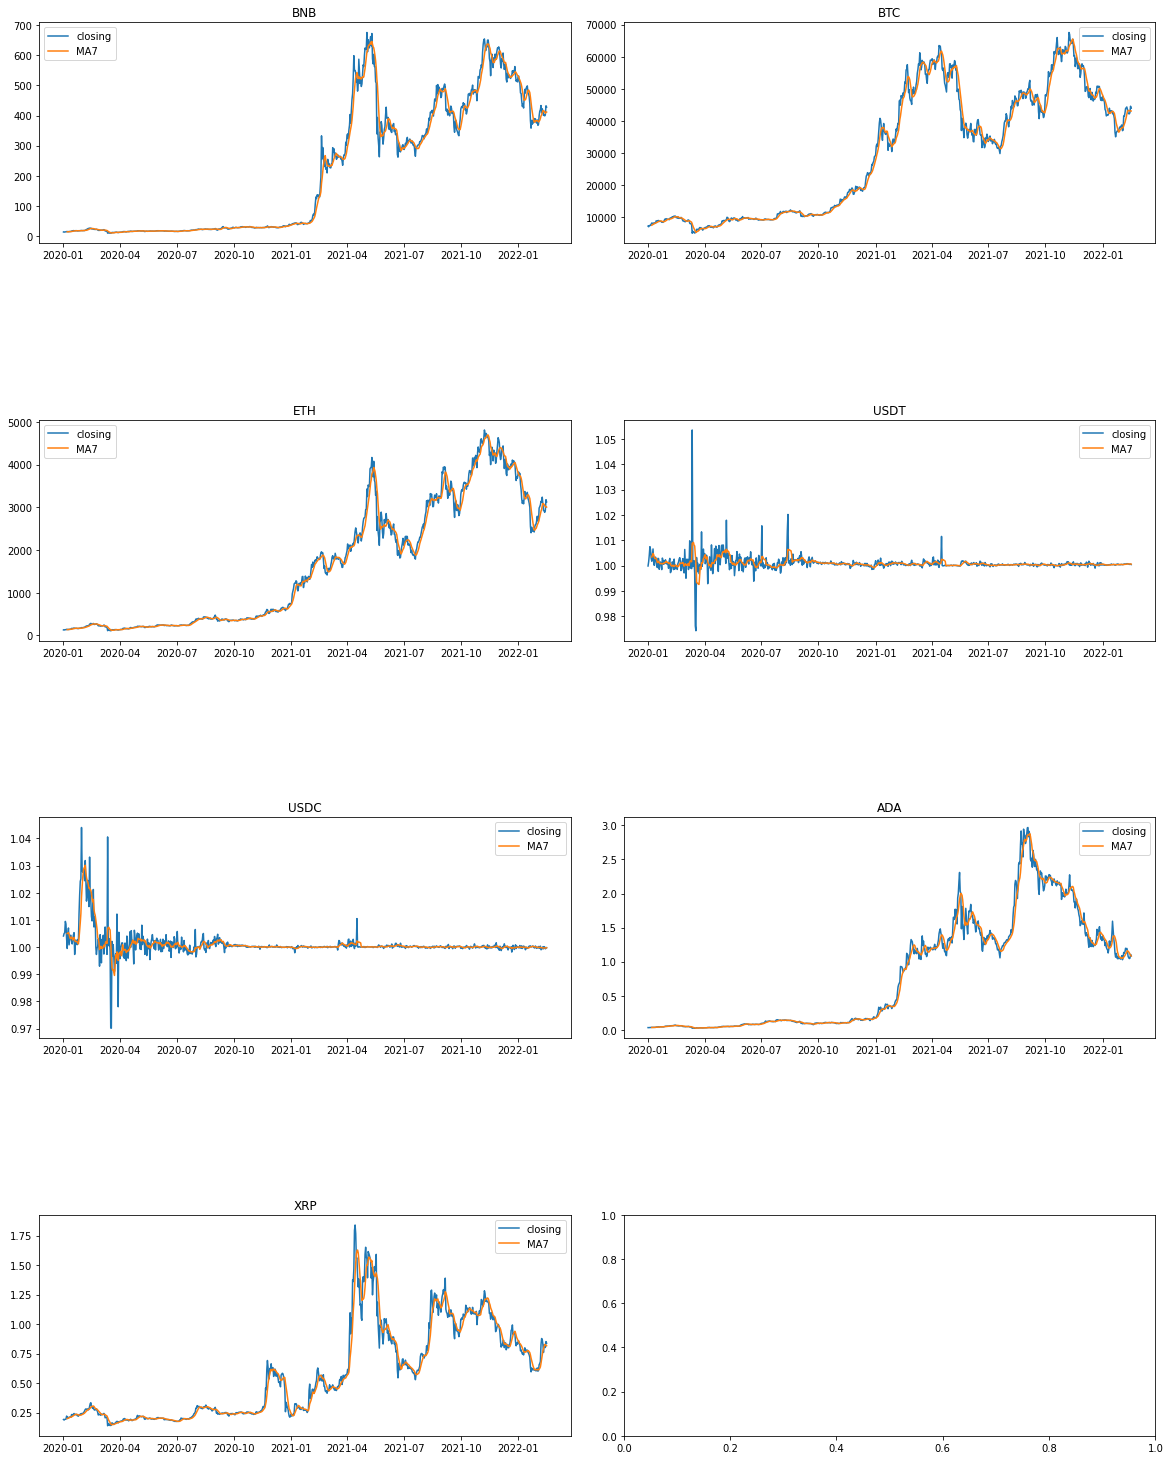

In [ ]:
# compute a short-term 7-day moving average
MA7 = adj_close.rolling(7).mean()
# compute a Medium-term 30-day moving average
MA30 = adj_close.rolling(30).mean()
# compute a Long-term 100-day moving average
MA100 = adj_close.rolling(100).mean()
# ploting the moving average
fig, axs = plt.subplots(4,2,figsize=(20,26),gridspec_kw ={'hspace': 0.8, 'wspace': 0.1})

axs[0,0].plot(adj_close['BNB-USD'], label= 'closing')
axs[0,0].plot(MA7['BNB-USD'], label= 'MA7')
axs[0,0].set_title('BNB')
axs[0,0].legend()


axs[0,1].plot(adj_close['BTC-USD'], label= 'closing')
axs[0,1].plot(MA7['BTC-USD'], label= 'MA7')
axs[0,1].set_title('BTC')
axs[0,1].legend()

axs[1,0].plot(adj_close['ETH-USD'], label= 'closing')
axs[1,0].plot(MA7['ETH-USD'], label= 'MA7')
axs[1,0].set_title('ETH')
axs[1,0].legend()

axs[1,1].plot(adj_close['USDT-USD'], label= 'closing')
axs[1,1].plot(MA7['USDT-USD'], label= 'MA7')
axs[1,1].set_title('USDT')
axs[1,1].legend()

axs[2,0].plot(adj_close['USDC-USD'], label= 'closing')
axs[2,0].plot(MA7['USDC-USD'], label= 'MA7')
axs[2,0].set_title('USDC')
axs[2,0].legend()

axs[2,1].plot(adj_close['ADA-USD'], label= 'closing')
axs[2,1].plot(MA7['ADA-USD'], label= 'MA7')
axs[2,1].set_title('ADA')
axs[2,1].legend()

axs[3,0].plot(adj_close['XRP-USD'], label= 'closing')
axs[3,0].plot(MA7['XRP-USD'], label= 'MA7')
axs[3,0].set_title('XRP')
axs[3,0].legend()



## Moving Averages - 30 days - Medium Term Trend

## Moving Averages - 100 days - Long Term Trend

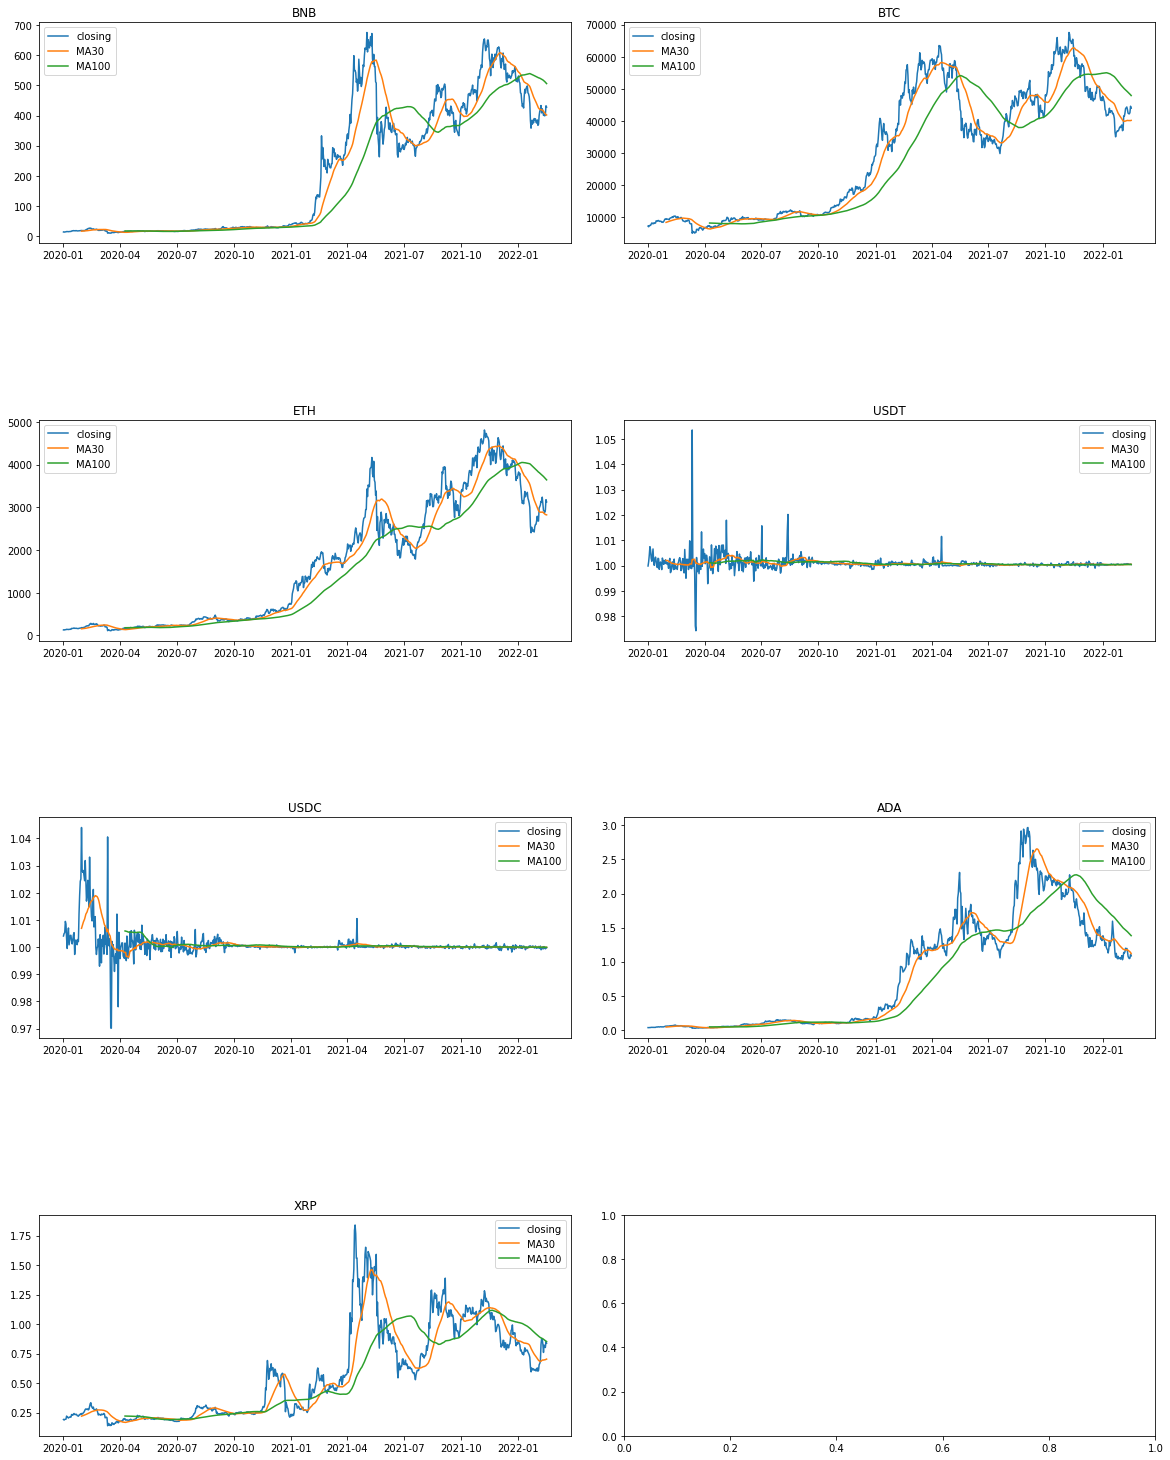

In [ ]:
# ploting the moving average
fig, axs = plt.subplots(4,2,figsize=(20,26),gridspec_kw ={'hspace': 0.8, 'wspace': 0.1})

axs[0,0].plot(adj_close['BNB-USD'], label= 'closing')
axs[0,0].plot(MA30['BNB-USD'], label= 'MA30')
axs[0,0].plot(MA100['BNB-USD'], label= 'MA100')
axs[0,0].set_title('BNB')
axs[0,0].legend()


axs[0,1].plot(adj_close['BTC-USD'], label= 'closing')
axs[0,1].plot(MA30['BTC-USD'], label= 'MA30')
axs[0,1].plot(MA100['BTC-USD'], label= 'MA100')
axs[0,1].set_title('BTC')
axs[0,1].legend()

axs[1,0].plot(adj_close['ETH-USD'], label= 'closing')
axs[1,0].plot(MA30['ETH-USD'], label= 'MA30')
axs[1,0].plot(MA100['ETH-USD'], label= 'MA100')
axs[1,0].set_title('ETH')
axs[1,0].legend()

axs[1,1].plot(adj_close['USDT-USD'], label= 'closing')
axs[1,1].plot(MA30['USDT-USD'], label= 'MA30')
axs[1,1].plot(MA100['USDT-USD'], label= 'MA100')
axs[1,1].set_title('USDT')
axs[1,1].legend()

axs[2,0].plot(adj_close['USDC-USD'], label= 'closing')
axs[2,0].plot(MA30['USDC-USD'], label= 'MA30')
axs[2,0].plot(MA100['USDC-USD'], label= 'MA100')
axs[2,0].set_title('USDC')
axs[2,0].legend()

axs[2,1].plot(adj_close['ADA-USD'], label= 'closing')
axs[2,1].plot(MA30['ADA-USD'], label= 'MA30')
axs[2,1].plot(MA100['ADA-USD'], label= 'MA100')
axs[2,1].set_title('ADA')
axs[2,1].legend()

axs[3,0].plot(adj_close['XRP-USD'], label= 'closing')
axs[3,0].plot(MA30['XRP-USD'], label= 'MA30')
axs[3,0].plot(MA100['XRP-USD'], label= 'MA100')
axs[3,0].set_title('XRP')
axs[3,0].legend()